
# 🔍 Pokemon Verileri Üzerinde Makine Öğrenmesi Analizi

Bu çalışmada, Pokemon özelliklerini kullanarak **Legendary** (efsanevi) olup olmadığını tahmin eden bir model oluşturacağız.
Aşamalar şunlardır:
1. Veriyi inceleme ve tanıma
2. Veri ön işleme
3. Model oluşturma
4. Performans değerlendirme


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Görsel ayar
sns.set(style="whitegrid")

# Veri yükleme
df = pd.read_csv("Pokemon.csv")
df.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:

print("📏 Veri boyutu:", df.shape)
print("\n📋 Veri bilgisi:")
print(df.info())

# Sayısal özet
df.describe().T


📏 Veri boyutu: (800, 13)

📋 Veri bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
None


,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0



=== HP Sütunu Dağılımı ===
HP
60     67
50     63
70     57
65     46
75     43
80     43
45     38
40     38
55     37
100    32
Name: count, dtype: int64


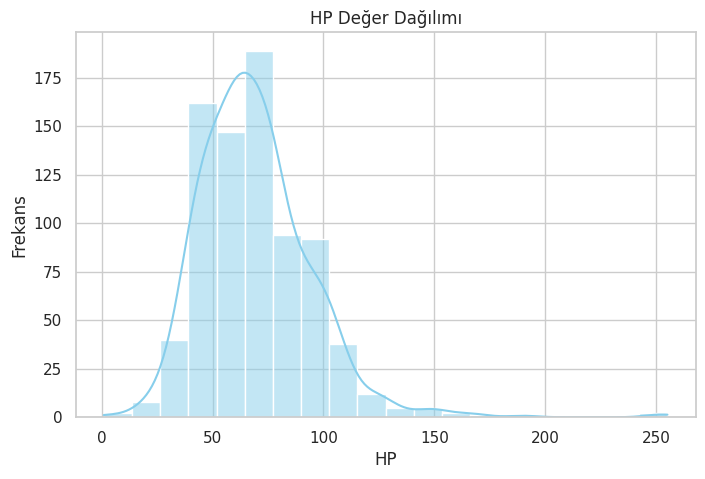

In [ ]:
print("\n=== HP Sütunu Dağılımı ===")
# "HP" sütunundaki değerlerin frekanslarını yazdır
print(df["HP"].value_counts().head(10))

# Yeni bir figür ve eksen oluştur
plt.figure(figsize=(8,5))
# "HP" sütununun histogramını ve yoğunluk eğrisini çizdir
sns.histplot(df["HP"], kde=True, bins=20, color="skyblue")
# Grafik başlığını ayarla
plt.title("HP Değer Dağılımı")
# X eksenini etiketle
plt.xlabel("HP")
# Y eksenini etiketle
plt.ylabel("Frekans")
# Grafiği göster
plt.show()


=== Attack Sütunu Dağılımı ===
Attack
100    40
65     39
80     37
50     37
60     33
85     33
75     32
70     31
90     30
55     30
Name: count, dtype: int64


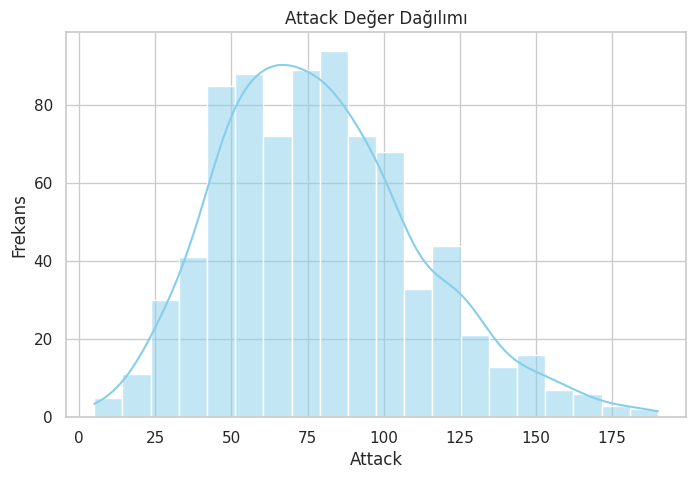

In [ ]:
print("\n=== Attack Sütunu Dağılımı ===")
# "Attack" sütunundaki değerlerin frekanslarını yazdır
print(df["Attack"].value_counts().head(10))

# Yeni bir figür ve eksen oluştur
plt.figure(figsize=(8,5))
# "Attack" sütununun histogramını ve yoğunluk eğrisini çizdir
sns.histplot(df["Attack"], kde=True, bins=20, color="skyblue")
# Grafik başlığını ayarla
plt.title("Attack Değer Dağılımı")
# X eksenini etiketle
plt.xlabel("Attack")
# Y eksenini etiketle
plt.ylabel("Frekans")
# Grafiği göster
plt.show()


=== Defense Sütunu Dağılımı ===
Defense
70     54
50     49
60     46
80     39
40     36
65     36
90     35
100    33
45     32
55     32
Name: count, dtype: int64


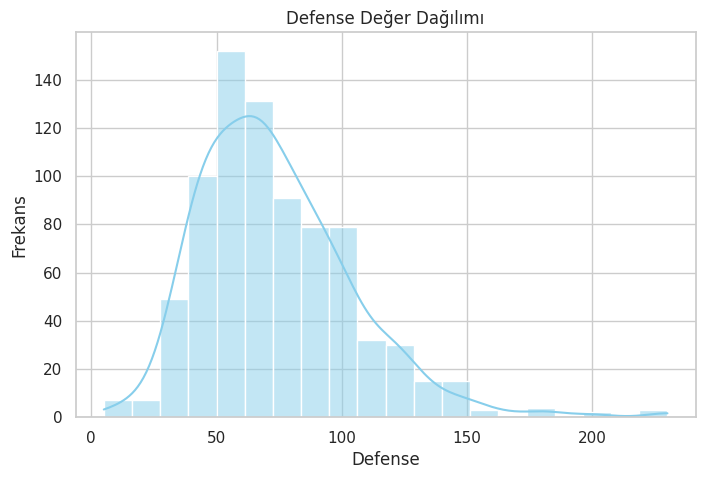

In [ ]:
print("\n=== Defense Sütunu Dağılımı ===")
# "Defense" sütunundaki değerlerin frekanslarını yazdır
print(df["Defense"].value_counts().head(10))

# Yeni bir figür ve eksen oluştur
plt.figure(figsize=(8,5))
# "Defense" sütununun histogramını ve yoğunluk eğrisini çizdir
sns.histplot(df["Defense"], kde=True, bins=20, color="skyblue")
# Grafik başlığını ayarla
plt.title("Defense Değer Dağılımı")
# X eksenini etiketle
plt.xlabel("Defense")
# Y eksenini etiketle
plt.ylabel("Frekans")
# Grafiği göster
plt.show()


=== Sp. Atk Sütunu Dağılımı ===
Sp. Atk
60     51
40     49
65     44
50     39
55     35
45     33
70     30
35     29
100    27
80     27
Name: count, dtype: int64


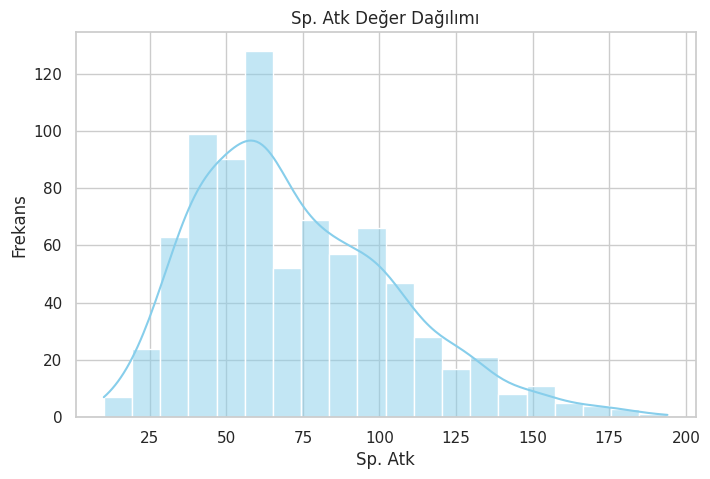

In [ ]:
print("\n=== Sp. Atk Sütunu Dağılımı ===")
# "Sp. Atk" sütunundaki değerlerin frekanslarını yazdır
print(df["Sp. Atk"].value_counts().head(10))

# Yeni bir figür ve eksen oluştur
plt.figure(figsize=(8,5))
# "Sp. Atk" sütununun histogramını ve yoğunluk eğrisini çizdir
sns.histplot(df["Sp. Atk"], kde=True, bins=20, color="skyblue")
# Grafik başlığını ayarla
plt.title("Sp. Atk Değer Dağılımı")
# X eksenini etiketle
plt.xlabel("Sp. Atk")
# Y eksenini etiketle
plt.ylabel("Frekans")
# Grafiği göster
plt.show()


=== Sp. Def Sütunu Dağılımı ===
Sp. Def
80    52
50    50
55    47
65    44
60    43
75    40
70    40
90    36
45    35
40    30
Name: count, dtype: int64


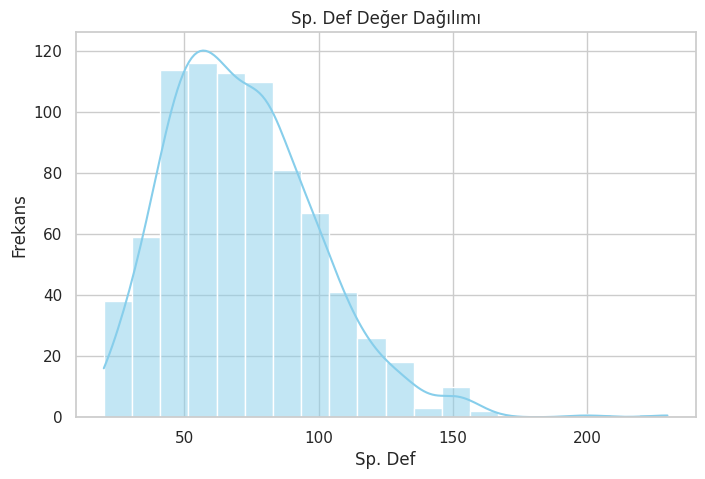

In [ ]:
print("\n=== Sp. Def Sütunu Dağılımı ===")
# "Sp. Def" sütunundaki değerlerin frekanslarını yazdır
print(df["Sp. Def"].value_counts().head(10))

# Yeni bir figür ve eksen oluştur
plt.figure(figsize=(8,5))
# "Sp. Def" sütununun histogramını ve yoğunluk eğrisini çizdir
sns.histplot(df["Sp. Def"], kde=True, bins=20, color="skyblue")
# Grafik başlığını ayarla
plt.title("Sp. Def Değer Dağılımı")
# X eksenini etiketle
plt.xlabel("Sp. Def")
# Y eksenini etiketle
plt.ylabel("Frekans")
# Grafiği göster
plt.show()


=== Speed Sütunu Dağılımı ===
Speed
50     46
60     44
70     37
65     36
30     35
80     33
40     32
100    31
90     31
55     30
Name: count, dtype: int64


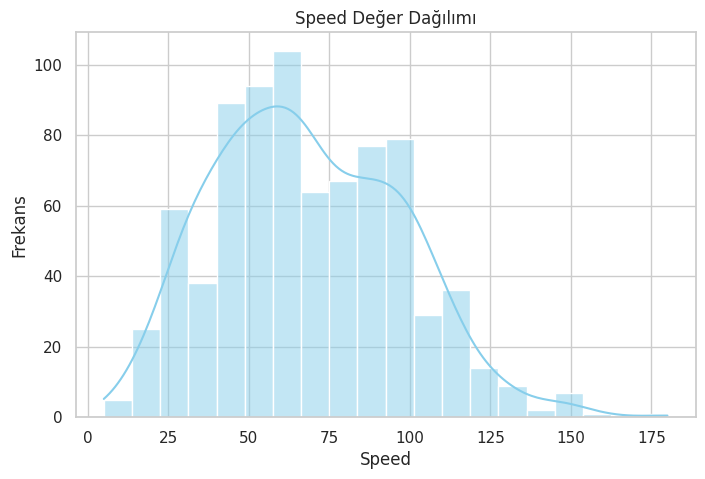

In [ ]:
print("\n=== Speed Sütunu Dağılımı ===")
# "Speed" sütunundaki değerlerin frekanslarını yazdır
print(df["Speed"].value_counts().head(10))

# Yeni bir figür ve eksen oluştur
plt.figure(figsize=(8,5))
# "Speed" sütununun histogramını ve yoğunluk eğrisini çizdir
sns.histplot(df["Speed"], kde=True, bins=20, color="skyblue")
# Grafik başlığını ayarla
plt.title("Speed Değer Dağılımı")
# X eksenini etiketle
plt.xlabel("Speed")
# Y eksenini etiketle
plt.ylabel("Frekans")
# Grafiği göster
plt.show()


=== Total Sütunu Dağılımı ===
Total
600    37
405    26
500    23
580    23
300    19
490    18
525    16
330    15
495    15
480    15
Name: count, dtype: int64


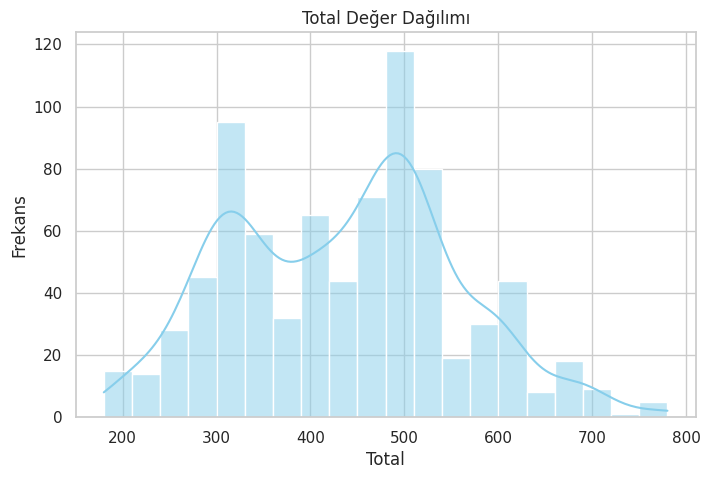

In [ ]:
print("\n=== Total Sütunu Dağılımı ===")
# "Total" sütunundaki değerlerin frekanslarını yazdır
print(df["Total"].value_counts().head(10))

# Yeni bir figür ve eksen oluştur
plt.figure(figsize=(8,5))
# "Total" sütununun histogramını ve yoğunluk eğrisini çizdir
sns.histplot(df["Total"], kde=True, bins=20, color="skyblue")
# Grafik başlığını ayarla
plt.title("Total Değer Dağılımı")
# X eksenini etiketle
plt.xlabel("Total")
# Y eksenini etiketle
plt.ylabel("Frekans")
# Grafiği göster
plt.show()


=== Generation Sütunu Dağılımı ===
Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64


/tmp/ipython-input-1118133847.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Generation"], palette="pastel")


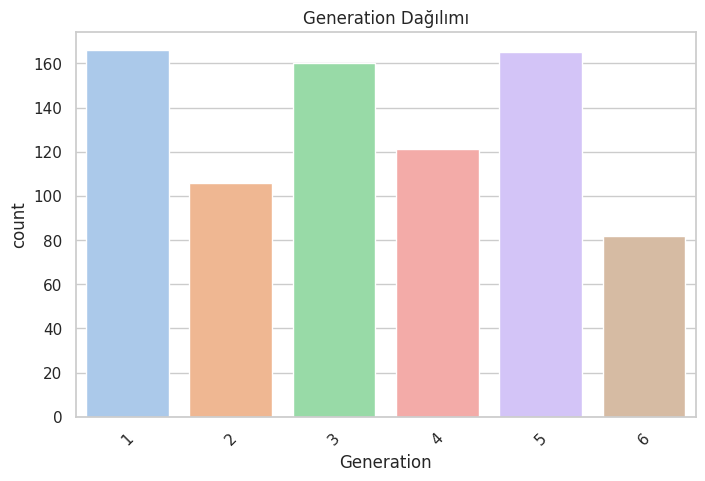

In [ ]:
print("\n=== Generation Sütunu Dağılımı ===")
# "Generation" sütunundaki değerlerin frekanslarını yazdır
print(df["Generation"].value_counts())

# Yeni bir figür ve eksen oluştur
plt.figure(figsize=(8,5))
# "Generation" sütununun dağılımını çubuk grafik olarak çizdir
sns.countplot(x=df["Generation"], palette="pastel")
# Grafik başlığını ayarla
plt.title("Generation Dağılımı")
# X eksenindeki etiketleri 45 derece döndür
plt.xticks(rotation=45)
# Grafiği göster
plt.show()


=== Type 1 Sütunu Dağılımı ===
Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64


/tmp/ipython-input-668411106.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Type 1"], palette="pastel")


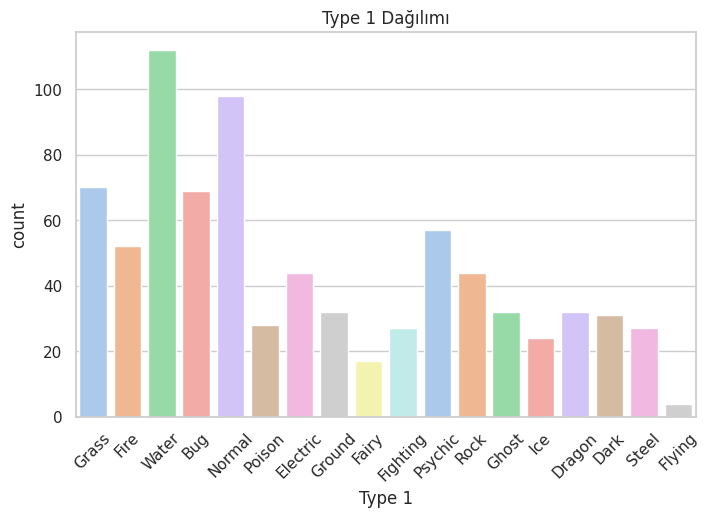

In [ ]:
print("\n=== Type 1 Sütunu Dağılımı ===")
# "Type 1" sütunundaki değerlerin frekanslarını yazdır
print(df["Type 1"].value_counts())

# Yeni bir figür ve eksen oluştur
plt.figure(figsize=(8,5))
# "Type 1" sütununun dağılımını çubuk grafik olarak çizdir
sns.countplot(x=df["Type 1"], palette="pastel")
# Grafik başlığını ayarla
plt.title("Type 1 Dağılımı")
# X eksenindeki etiketleri 45 derece döndür
plt.xticks(rotation=45)
# Grafiği göster
plt.show()


=== Type 2 Sütunu Dağılımı ===
Type 2
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ice         14
Rock        14
Water       14
Ghost       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: count, dtype: int64


/tmp/ipython-input-1064481410.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Type 2"], palette="pastel")


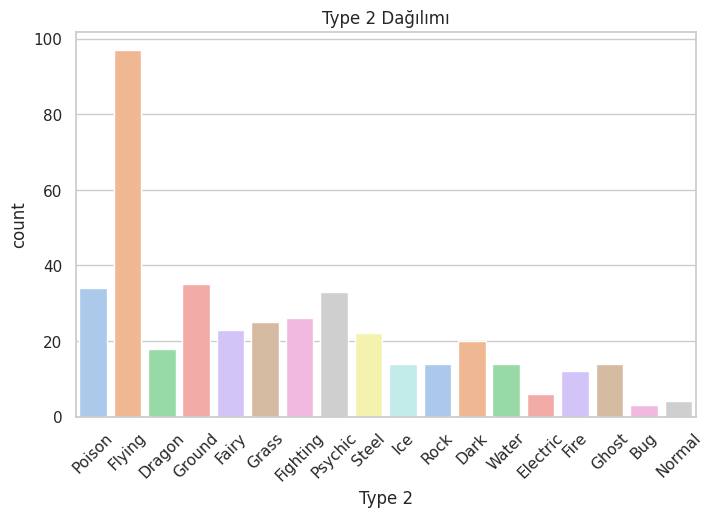

In [ ]:
print("\n=== Type 2 Sütunu Dağılımı ===")
# "Type 2" sütunundaki değerlerin frekanslarını yazdır
print(df["Type 2"].value_counts())

# Yeni bir figür ve eksen oluştur
plt.figure(figsize=(8,5))
# "Type 2" sütununun dağılımını çubuk grafik olarak çizdir
sns.countplot(x=df["Type 2"], palette="pastel")
# Grafik başlığını ayarla
plt.title("Type 2 Dağılımı")
# X eksenindeki etiketleri 45 derece döndür
plt.xticks(rotation=45)
# Grafiği göster
plt.show()


=== Legendary Sütunu Dağılımı ===
Legendary
False    735
True      65
Name: count, dtype: int64


/tmp/ipython-input-182962915.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Legendary"], palette="pastel")


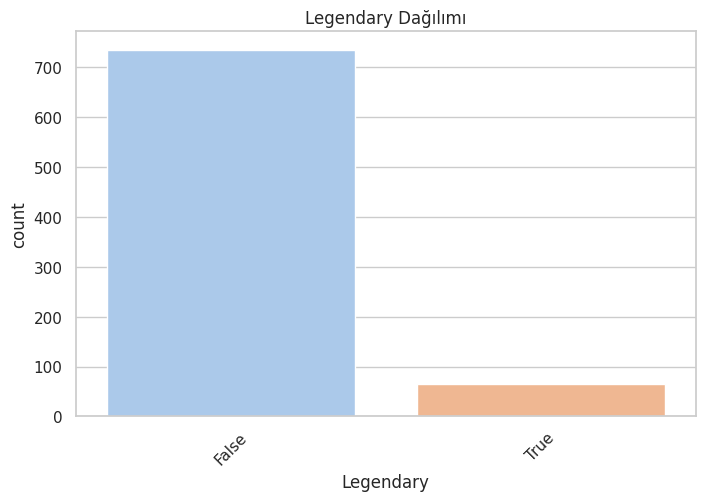

In [ ]:
print("\n=== Legendary Sütunu Dağılımı ===")
# "Legendary" sütunundaki değerlerin frekanslarını yazdır
print(df["Legendary"].value_counts())

# Yeni bir figür ve eksen oluştur
plt.figure(figsize=(8,5))
# "Legendary" sütununun dağılımını çubuk grafik olarak çizdir
sns.countplot(x=df["Legendary"], palette="pastel")
# Grafik başlığını ayarla
plt.title("Legendary Dağılımı")
# X eksenindeki etiketleri 45 derece döndür
plt.xticks(rotation=45)
# Grafiği göster
plt.show()

In [ ]:
print("Eksik değer var mı?:")
# Her sütundaki eksik değer sayısını yazdır
print(df.isnull().sum())

# "Type 2" sütunundaki boş değer oranını hesapla
missing_ratio = df["Type 2"].isnull().mean() * 100
# "Type 2" sütunundaki boş değer oranını formatlı olarak yazdır
print(f"Type 2 sütunundaki boş değer oranı: %{missing_ratio:.2f}")

Eksik değer var mı?:
#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64
Type 2 sütunundaki boş değer oranı: %48.25


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


# Kopya oluştur
df_model = df.copy()

# Gereksiz sütunlar
drop_cols = ["#", "Name"]
df_model.drop(columns=drop_cols, inplace=True)

# Kategorik encoding
le = LabelEncoder()
df_model["Type 1"] = le.fit_transform(df_model["Type 1"])
df_model["Type 2"] = df_model["Type 2"].fillna("None")
df_model["Type 2"] = le.fit_transform(df_model["Type 2"])
df_model["Legendary"] = df_model["Legendary"].astype(int)

# Bağımlı / bağımsız değişkenler
X = df_model.drop(columns=["Legendary"])
y = df_model["Legendary"]

# Train-test bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

print("=== İlk Model Performansı ===")
print(classification_report(y_test, y_pred))


=== İlk Model Performansı ===
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       147
           1       0.44      0.31      0.36        13

    accuracy                           0.91       160
   macro avg       0.69      0.64      0.66       160
weighted avg       0.90      0.91      0.91       160



En iyi parametreler: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

=== Gelişmiş Model Performansı ===
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       147
           1       0.48      0.85      0.61        13

    accuracy                           0.91       160
   macro avg       0.73      0.88      0.78       160
weighted avg       0.94      0.91      0.92       160



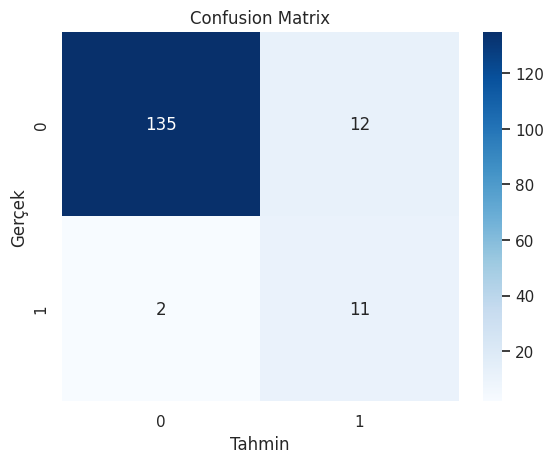

In [ ]:

# SMOTE uygulama
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# GridSearch ile en iyi hiperparametre
param_grid = { "C": [0.01, 0.1, 1, 10], "penalty": ["l2"], "solver": ["lbfgs"] }
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring="f1")
grid.fit(X_train_res, y_train_res)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("En iyi parametreler:", grid.best_params_)
print("\n=== Gelişmiş Model Performansı ===")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Görsel ayar
sns.set(style="whitegrid")

# Veri yükleme
# Make sure to upload 'Pokemon.csv' to your Colab environment and
# update the file path below if necessary.
try:
    df = pd.read_csv("Pokemon.csv")
    display(df.head())
except FileNotFoundError:
    print("Error: 'Pokemon.csv' not found. Please upload the file to your Colab environment.")

Error: 'Pokemon.csv' not found. Please upload the file to your Colab environment.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Pokemon.csv to Pokemon.csv
